# Overview

This project sets out to analyze the precision between the public and the university-owned professor evaluation platforms: RateMyProfessors and CAPEs. In order to determine whether the more popular, non-university specific platform RateMyProfessors accurately portrays the results suggested by CAPEs, we needed to build a predictor to compute the features of CAPEs given related features from RateMyProfessors. From this, we can understand how much RateMyProfessors reflect the reviews from CAPEs or whether the variance is too great. Thus, we can determine the precision of such platforms with respect to one another.

# Contributers

- Connor Frank
- Andrew Kuo
- Thomas Wan
- Yifeng Hua

# Research Question

RateMyProfessors vs CAPES - How consistent are professor reviews across these two platforms in terms of ratings on websites? 
Can we predict CAPEs ratings from RateMyProfessors features (difficulty, department, quality)?

## Background and Prior Work

Students rely on professor reviews when selecting course schedules and forecasting time management. RateMyProfessors is a national survey of professor ratings, whereas CAPEs is a professor and class rating survey localized solely at the University of California, San Diego (UCSD). The participants and audience on both platforms may vary greatly due to their difference in scope. Since these two websites are really important for UCSD students to check the professors and courses, the similarity and difference for reviews across these two platforms are essential. As a result, we believe it’s interesting to analyze and visualize the datasets to see how consistent are the reviews across two datasets. RateMyProfessors and CAPEs have some overlapping metrics like “overall rating,” some similar metrics like “Would Take Again” (RateMyProfessors) and “Recommend Professor” (CAPEs), and some different metrics like “Professor Tags” (RateMyProfessors). As a result, it led to our hypothesis that some features (such as grades) should be strongly correlated, and some subjective features are predictive for related CAPEs ratings.

We notice that many other groups have done the data analysis of CAPEs for various purposes such as determining the best routine to graduate with a good grade point average, etc. There are also many data analysis projects for RateMyProfessors. For example, there is this project that analyzes the potential relationship between word choices and instructors’ gender on the RateMyProfessors website (Rate My Word Choice). It turns out that “strict” and “demanding” are more likely to describe women professors and “intellect” is more likely to describe men professors. The project is relevant because It gives us a good example of utilizing data analysis and visualization techniques including text mining, regressions, matplotlib plotting to conduct research and answer our own questions. 

There is another good example in the article by James Otto, Douglas A. Sanford Jr, and Douglas N. Ross. The author analyzes if RateMyProfessors really rates the professor, which examines the usefulness and validity of ratings. He compares the clarity, helpfulness, easiness, and variability to explore the patterns and relationships. This example is relevant to our project because it gives us an idea of how to relate the features with each other and conduct data analysis appropriately. It could give us a great example of a formal way to conduct a research analysis. 

References (include links):
- 1) Rate My Word Choice - https://www.insidehighered.com/news/2015/02/09/new-analysis-rate-my-professors-finds-patterns-words-used-describe-men-and-women
- 2) Does ratemyprofessor.com really rate my professor? - https://www.tandfonline.com/doi/full/10.1080/02602930701293405

# Hypothesis


Similar features across RateMyProfessors and CAPEs (such as the ratio of grade distribution to professor recommendation) will strongly correlate while subjective features like Tags and level of difficulty are predictive for related CAPEs ratings. We have this hypothesis because we believe that the reviews from RateMyProfessor should reflect what students think about the courses and the professors, similar to those reflections on CAPES. The two websites share many similar features such as difficulty, ratings, and so on. As a result, we believe there should be corrleations among these features.


# Dataset(s)

We web scraped RateMyProfessors for UC San Diego professors and dataset from CAPEs, which is also open for the public.

## RateMyProfessors
- Dataset Name: RateMyProfessors
- Description: This data set is scraped from a public, non-university specific website that gathers reviews from students anonymously. We will be using this data as the input for our predictor in order to determine its similarities and differences from the university-specific data set.
- Link to the dataset: https://www.ratemyprofessors.com/campusRatings.jsp?sid=1079
- Number of observations: 2861
- Features examined from this dataset:
    - Overall Quality (1.0 - 5.0)
    - Level of Difficulty (1.0 - 5.0)
    - For Credit (Yes/No)
    - Attendance (Mandatory/Not Mandatory)
    - Textbook Used (Yes/No)
    - Would Take Again (Yes/No)
    - Grade Received (A - F)
    - Tags
    - Comment
    - Review “helpfulness” upvotes/downvotes

## CAPEs
- Dataset Name: CAPEs
- Description: This data set is scraped from verified student reviews for specifically the University of California, San Diego. The data set set has many features including "Recommend Instructor." This data set is used to compare the result from RateMyProfessors and determine how precise the evaluations are between them.
- Link to the dataset: http://www.cape.ucsd.edu/
- Number of observations: 3335
- Features examined from this dataset:
    - Recommend Instructor
    - Recommend Course
    - Exams Represent Course Material
    - Instructor is Clear and Audible
    - Expected Grade
    - Grade Received
    - Course Difficulty Relative to Others
    - Hours Spent Studying Outside of Class (per Week)
    - How Often Attended Course
    - Instructor-Specific Ratings (similar to “Tags”) 
    - Total Evaluations Made

# Setup

In [1]:
import pandas as pd
import numpy as np
import sys
import glob
import errno
import json
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
#RATE_MY_PROF_DATA_FILE_PATH = './ratemyprof.json'
CAPES_DATA_FILE_PATH = './webscrape/capes2.json'
OUTPUT_PATH = './webscrape/cleandata.json'

In [3]:
def loadJSONFile(filepath):
    contentString = ''
    try:
        with open(filepath) as f:
            contentString = f.read()
    except IOError as err:
        if err.errno != errno.EISDIR:
            raise
    return json.loads(contentString)

In [4]:
capeData = loadJSONFile(CAPES_DATA_FILE_PATH)

# Data Cleaning

Each description section (in markdown) will refer to the code(s) above, to describe what the code(s) is doing.

#### RateMyProf

In [5]:
df_ratemyprof = pd.read_csv('rating.csv')
df_ratemyprof[:10]

,Department,First_Name,Last_Name,Quality,Take_Again,Difficulty
0,Accounting,['Joe'],['Pecore'],4.6,100%,2.2
1,Accounting,['Robert'],['Houskeeper'],3.6,67%,2.3
2,Accounting,['John'],['Anderson'],3.0,NaN,3.2
3,Accounting,['Suzan'],['Dennis'],4.2,NaN,1.8
4,Accounting,['Robert'],['Housekeeper'],4.5,100%,1.6
5,Accounting,['Bruce'],['Blakely'],2.3,NaN,3.8
6,Accounting,['Ronald'],['LaPlante'],2.3,NaN,4.0
7,Accounting,['Jeremy'],['Bertomeu'],3.5,NaN,3.0
8,Accounting,['Jason'],['Brenier'],1.0,NaN,5.0
9,Accounting,['Gilad'],['Dechner'],5.0,NaN,5.0


In [6]:
# ['name'] -> name

def extract_name(name): return name[2:len(name)-2].upper()

df_ratemyprof['First_Name'] = df_ratemyprof['First_Name'].apply(extract_name)
df_ratemyprof['Last_Name'] = df_ratemyprof['Last_Name'].apply(extract_name)

When webscraping RateMyProfessor, the first and last name was returned as an array. In the cell above, we convert the data in the column First_name and Last_name to a string. Every string will then be uppercased, so that it is consistent with the Capes dataset

In [7]:
# extract 'Take_Again'
# 0% -> 0, 100% -> 1

def convert_takeagain(str_in): 
    if type(str_in) == float:
        return str_in
    
    str_in = str_in.strip()
    str_in = str_in.replace('%', '')
    
    if str_in.isnumeric():
        out = float(int(str_in) / 100)
    else:
         out = np.nan
    return out

df_ratemyprof['Take_Again'] = df_ratemyprof['Take_Again'].apply(convert_takeagain)

We took out the percent sign in the Take_Again column in the RateMyProfessor dataset by replace the % symbol with '' and convert the value into decimal.  

In [8]:
len(df_ratemyprof)

2861

In [9]:
df_ratemyprof[:10]

,Department,First_Name,Last_Name,Quality,Take_Again,Difficulty
0,Accounting,JOE,PECORE,4.6,1.00,2.2
1,Accounting,ROBERT,HOUSKEEPER,3.6,0.67,2.3
2,Accounting,JOHN,ANDERSON,3.0,NaN,3.2
3,Accounting,SUZAN,DENNIS,4.2,NaN,1.8
4,Accounting,ROBERT,HOUSEKEEPER,4.5,1.00,1.6
5,Accounting,BRUCE,BLAKELY,2.3,NaN,3.8
6,Accounting,RONALD,LAPLANTE,2.3,NaN,4.0
7,Accounting,JEREMY,BERTOMEU,3.5,NaN,3.0
8,Accounting,JASON,BRENIER,1.0,NaN,5.0
9,Accounting,GILAD,DECHNER,5.0,NaN,5.0


#### CAPEs

In [10]:
cleanData = {}
capeAverageData = {}

In [11]:
# Get relevant capes data...
for key in capeData:
    for value in capeData[key]:
        if not value['instructor']:
            print('Skipped \'' + str(value) + '\'...')
            continue

        fullName = value['instructor'].upper()
        lastName = fullName[:fullName.index(',')]
        
        # Create the data entry if it doesn't exist...
        dataEntry = None
        if lastName in capeAverageData:
            dataEntry = capeAverageData[lastName]
        else:
            dataEntry = capeAverageData[lastName] = {
                "name": fullName,
                "value": 0,
                "count": 0,
                "average": 0,
            }

        # Removes any profs with duplicate last names
        if dataEntry['name'] != fullName:
            del capeAverageData[lastName]
        else:
            # Save the data for average func later
            recommendValue = float(value['recommendedInstr'][:-1].strip())
            recommendCount = int(value['evalCount'])
            capeAverageData[lastName]['value'] += recommendValue * recommendCount
            capeAverageData[lastName]['count'] += recommendCount

Skipped '{'AvgGradeExpected': 'B+ (3.48)', 'AvgGradeReceived': 'N/A', 'StudyHrs/Week': '9.46', 'course': 'ECE 108 - Digital Circuits               (A)', 'enrolled': '50', 'evalCount': '23', 'instructor': '', 'recommendedClass': '95.7 %', 'recommendedInstr': '69.6 %', 'term': 'WI10'}'...
Skipped '{'AvgGradeExpected': 'A (4.00)', 'AvgGradeReceived': 'N/A', 'StudyHrs/Week': '1.83', 'course': 'HDP 98 - Directed Group Study           (A)', 'enrolled': '42', 'evalCount': '24', 'instructor': '', 'recommendedClass': '83.3 %', 'recommendedInstr': '83.3 %', 'term': 'SP10'}'...
Skipped '{'AvgGradeExpected': 'B (3.00)', 'AvgGradeReceived': 'N/A', 'StudyHrs/Week': '0.83', 'course': 'HDP 98 - Directed Group Study           (A)', 'enrolled': '31', 'evalCount': '18', 'instructor': '', 'recommendedClass': '94.4 %', 'recommendedInstr': '100.0 %', 'term': 'WI10'}'...
Skipped '{'AvgGradeExpected': 'A (4.00)', 'AvgGradeReceived': 'N/A', 'StudyHrs/Week': '1.62', 'course': 'HDP 98 - Directed Group Study     

In [12]:
# Compute average for that data...
for _, value in capeAverageData.items():
    value['average'] = float(value['value']) / float(value['count'])

In [13]:
# Set it to the output data...
cleanData = capeAverageData

In [14]:
# Write data to output
output = json.dumps(cleanData, indent=4, sort_keys=True)
outputFile = open(OUTPUT_PATH, 'w')
outputFile.write(output)
outputFile.close()

In [15]:
df_capes = pd.read_json(OUTPUT_PATH)
df_capes = df_capes.T
df_capes[:10]

,average,count,name,value
AAMARI,73.7491,285,"AAMARI, EDDIE",21018.5
ABARBANEL,64.225,96,"ABARBANEL, HENRY DON ISAAC",6165.6
ABBASI,91.675,12,"ABBASI, SHAGHAYEGH",1100.1
ABBASI HAFSHEJANI,89.4173,52,"ABBASI HAFSHEJANI, ANAHITA",4649.7
ABD EL-MESSIH,74.4,40,"ABD EL-MESSIH, ANDREW SAAD",2976
ABEL,86.5255,47,"ABEL, DAVID",4066.7
ABI GHANEM,90.043,142,"ABI GHANEM, MAROUN",12786.1
ABI SAMRA,97.7182,181,"ABI SAMRA, NICHOLAS CAMILL",17687
ABRAJANO,75.0832,819,"ABRAJANO, MARISA",61493.1
ABRAMSON,80.9796,313,"ABRAMSON, IAN S",25346.6


In [16]:
first_names = []
last_names = []
for name in df_capes['name']:
    last_names.append(name.split(',')[0])
    first_names.append(name.split()[1])
df_capes['First_Name'] = first_names
df_capes['Last_Name'] = last_names

In [17]:
df_capes = df_capes.drop(columns='name')
df_capes[:10]

,average,count,value,First_Name,Last_Name
AAMARI,73.7491,285,21018.5,EDDIE,AAMARI
ABARBANEL,64.225,96,6165.6,HENRY,ABARBANEL
ABBASI,91.675,12,1100.1,SHAGHAYEGH,ABBASI
ABBASI HAFSHEJANI,89.4173,52,4649.7,"HAFSHEJANI,",ABBASI HAFSHEJANI
ABD EL-MESSIH,74.4,40,2976,"EL-MESSIH,",ABD EL-MESSIH
ABEL,86.5255,47,4066.7,DAVID,ABEL
ABI GHANEM,90.043,142,12786.1,"GHANEM,",ABI GHANEM
ABI SAMRA,97.7182,181,17687,"SAMRA,",ABI SAMRA
ABRAJANO,75.0832,819,61493.1,MARISA,ABRAJANO
ABRAMSON,80.9796,313,25346.6,IAN,ABRAMSON


While cleaning Capes dataset, we are computing the weighted average for any missing entiries. We also uppercase the first and last names of the professor, so that it is consistent with the RateMyProfessors dataset. 

In [18]:
len(df_capes)

3335

#### Merging RateMyProfessor and CAPEs

In [19]:
df = pd.merge(df_ratemyprof, df_capes, how='inner', on=['First_Name','Last_Name'])

In [20]:
df = df.drop_duplicates(subset=df.columns.difference(['Department']))

In [21]:
len(df)

1296

In [22]:
df

,Department,First_Name,Last_Name,Quality,Take_Again,Difficulty,average,count,value
0,Accounting,ROBERT,HOUSKEEPER,3.6,0.67,2.3,92.3508,5465,504697
2,Accounting,JEREMY,BERTOMEU,3.5,NaN,3.0,85.5691,81,6931.1
4,Accounting,GILAD,DECHNER,5.0,NaN,5.0,64.3452,93,5984.1
6,American Sign Language,MARGARET,LOTT,5.0,NaN,3.0,97.3483,232,22584.8
8,Anthropology,DAVID,JORDAN,3.9,0.45,3.3,82.8337,1742,144296
9,English,DAVID,JORDAN,4.5,NaN,3.2,82.8337,1742,144296
11,Anthropology,HEIDI,KELLER-LAPP,2.6,0.33,3.4,85.2582,770,65648.8
12,Anthropology,GUILLERMO,ALGAZE,3.5,0.60,2.8,72.9132,1594,116224
13,Anthropology,PAUL,GOLDSTEIN,3.5,0.63,2.5,82.8384,1011,83749.6
14,Anthropology,JANA,FORTIER,4.0,NaN,2.7,83.0498,621,51573.9


We merge the two data frames, into one dataframe, by comparing the first and last name in RateMyProfessor and Capes. The datasets are cleaned and are ready to use.

# Data Visualization

Here's what we found.

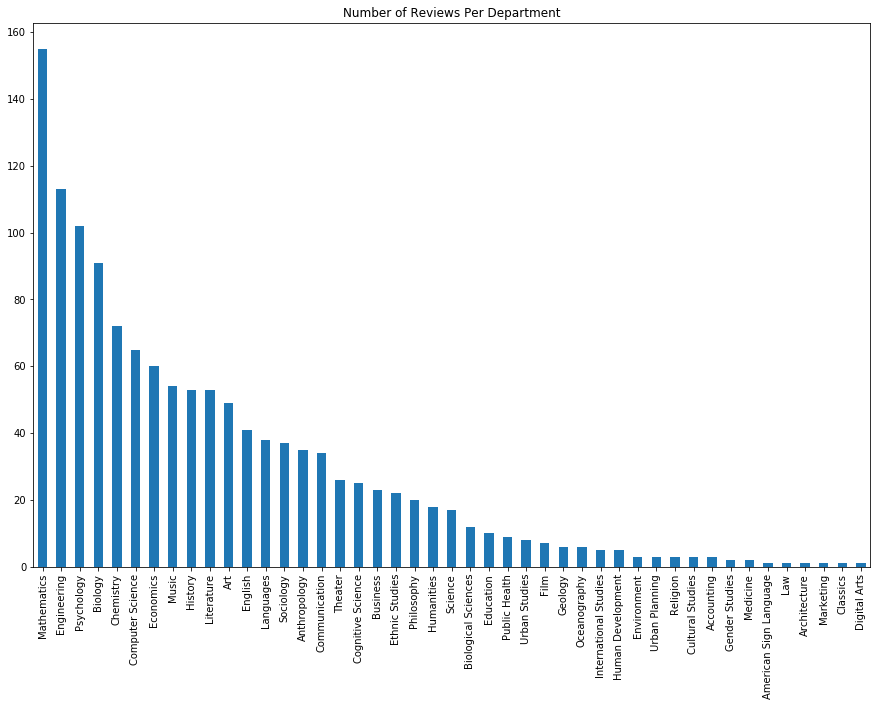

In [23]:
df['Department'].value_counts().plot.bar(figsize=(15, 10), title='Number of Reviews Per Department')

The graph gives us the number of reviews for each unique department. We choose to make the graph right-skewed, which shows the most popular departments on the left side. As we can see in the graph, the number of reviews in each department is not consistent. For instance, there are over 150 reviews for Mathematics department, while there are less than 5 reviews for the Classics department. There are much more students rating professors in the Mathematics department, than that of the Classics department. We found that the popular majors such as engineering and science in University of California San Diego have much more reviews than the non-popular majors.

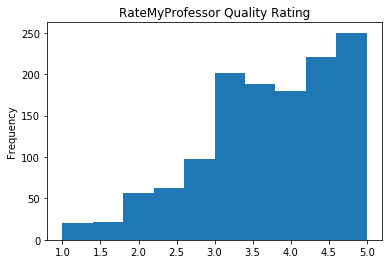

In [24]:
df['Quality'].plot.hist(title='RateMyProfessor Quality Rating')

We would like to see the overall distribution for the quality rating feature on RateMyProfessor website. As we could see on the graph, the quality rating in RateMyProfessor is leftly skewed. There are much more 5.0 ratings than 1.0 of the quality of the professors. We could also found out that the top 3 frequent ratings are "5", "4.5", and "3." Reviewers always tend to give relatively high quality rating scores (above 4) for UCSD professors. And they are not likely to give very low scores (below 3) for the professors. We could see that most students will give a score of 3 if they didn't have relatively good experiences.

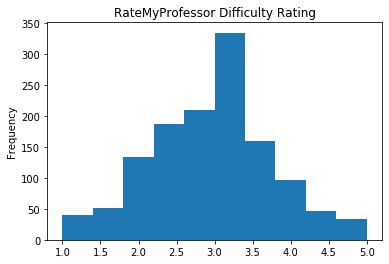

In [25]:
df['Difficulty'].plot.hist(title='RateMyProfessor Difficulty Rating')

We also would like to see the overall distribution of difficulty rating feature on RateMyProfessor. As we could see in the graph, the difficulty rating is a bell curve. The average difficulty of a class at UCSD is roughly 3.3. Most of the ratings are from 2 to 4, which infers that most reviewers believe that the difficulties of courses are average and appropriate. Nevertheless, we found out that reviewers at UCSD tend to give lower score for the difficulty rating. 

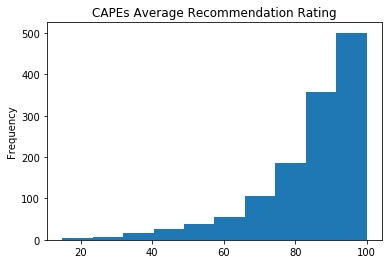

In [26]:
df['average'].plot.hist(title='CAPEs Average Recommendation Rating')

Finally, we need to see the overall distribution for CAPES average recommendation ratings. As we could see in the graph, in Capes, the recommendation of professors is leftly skewed. There are many professors that have high recommendation ratings. Most of the professors have 80 to 100% recommendation rate. This infers that majority of students tend to recommend the professor that they took the class with. 

# Data Analysis & Results

For data analysis, we decided to use the linear regression model for predictions. As a result, we need to transfer the department feature to a numerical representation. As a result, we decided to use one-hot encoding technique to complete this task. 

In [27]:
# define example
departments = list(df['Department'].unique())
values = array(departments)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

['Accounting' 'American Sign Language' 'Anthropology' 'English'
 'Architecture' 'Art' 'Biological Sciences' 'Biology' 'Business'
 'Chemistry' 'Science' 'Classics' 'Cognitive Science' 'Communication'
 'Computer Science' 'Cultural Studies' 'Digital Arts' 'Economics'
 'Education' 'Engineering' 'Humanities' 'Environment' 'Ethnic Studies'
 'Film' 'Gender Studies' 'Geology' 'History' 'Human Development'
 'International Studies' 'Languages' 'Law' 'Literature' 'Religion'
 'Marketing' 'Mathematics' 'Medicine' 'Music' 'Oceanography' 'Philosophy'
 'Psychology' 'Public Health' 'Sociology' 'Theater' 'Urban Planning'
 'Urban Studies']
[ 0  1  2 18  3  4  5  6  7  8 40  9 10 11 12 13 14 15 16 17 26 19 20 21
 22 23 24 25 27 28 29 30 39 31 32 33 34 35 36 37 38 41 42 43 44]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/yifenghua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [28]:
# One-hot encoding
department_onehot = {}
i = 0
for d in departments:
    department_onehot[d] = onehot_encoded[i]
    i += 1
department_onehot

{'Accounting': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'American Sign Language': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Anthropology': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'English': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Architecture': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0

Creating a one hot encoding for each department. 

In [29]:
# feature method to append all features into one datum.
def feature(d):
    feat = [1]
    feat.append(d['Quality'])
    feat.append(d['Difficulty'])
    for i in department_onehot[d['Department']]:
        feat.append(i)
    feat.append(d['average'])
    return feat

In [30]:
X = [feature(d) for i,d in df.iterrows()]

In [31]:
# shuffle the data
import random
random.shuffle(X)

In [32]:
# Set y values for predictions
y = []
for x in X:
    y.append(x[-1])
    del x[-1]

In [33]:
# first feature values encoded
X[0]

[1,
 4.4,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [34]:
# Splitting the training and test data sets
size = int(.8 * len(X))
Xtrain = X[:size]
Xtest = X[size:]

ytrain = y[:size]
ytest = y[size:]

len(Xtrain), len(Xtest)

(1036, 260)

In [35]:
# Linear Regression model
mod = linear_model.LinearRegression()
mod.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Make Prediction
pred = mod.predict(Xtest)

In [37]:
# Set the limit for prediction
for p in pred: 
    if p > 100: p = 100

In [38]:
# Data analysis
mse = mean_squared_error(ytest, pred)
r = 1 - mse / np.var(ytest)

In [39]:
# Print the MSE and R^2 values
mse, r

(161.1973589225253, 0.35820878749554974)

Here we are using the mean squared error and coefficient of determination (R^2) to evaluate our model. The mean suqared error measures the average of the squares of the errors (difference between prediction and actual values). The coefficient of determination (R^2) shows how well a model explains and predicts future outcomes by presenting how much of the observed variation can be explained by the model. As we could see in the cell above, the R^2 value is less than 0.5, which means less than half of the observed variation can be explained by the model.

In [40]:
# First ten test values
ytest[:10]

[96.1309689677011,
 43.55845238095238,
 80.31135371179039,
 93.45417536534447,
 88.56891322662172,
 32.899284692417744,
 97.19702233250621,
 83.54634146341463,
 56.15949656750571,
 48.71170212765957]

In [41]:
# First ten prediction values
pred[:10]

array([ 94.11142024,  64.8765801 ,  84.08645812,  93.39911667,
        74.60329576,  74.66616752, 103.01988476,  85.20765298,
        72.22669027,  80.40151332])

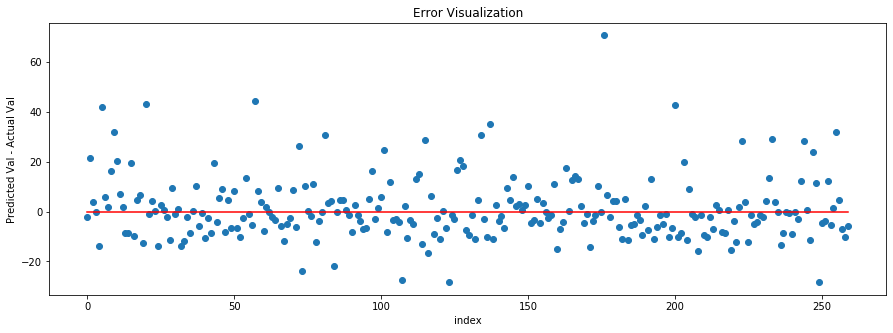

In [42]:
# Error Visualization
diff = [p-y for p,y in zip(pred,ytest)]
plt.scatter(range(0,len(diff)), diff)
plt.plot(range(0,len(diff)), [0]*len(diff), c='red')
plt.xlabel('index')
plt.ylabel('Predicted Val - Actual Val')
plt.title('Error Visualization')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

In [43]:
under = [p for p in diff if p < 0]
over = [p for p in diff if p > 0]
len(under), len(over)

(149, 111)

In [46]:
import statsmodels.api as sm
# regression report
mod = sm.OLS(ytrain,Xtrain)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [48]:
fii.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.397    
Dependent Variable: y                AIC:                8008.9859
Date:               2019-12-12 05:16 BIC:                8236.3696
No. Observations:   1036             Log-Likelihood:     -3958.5  
Df Model:           45               F-statistic:        16.11    
Df Residuals:       990              Prob (F-statistic): 4.29e-89 
R-squared:          0.423            Scale:              127.67   
--------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------
const     50.2653     2.6592   18.9027   0.0000    45.0470   55.4835
x1         8.7520     0.4276   20.4694   0.0000     7.9130    9.5911
x2         0.4228     0.5128    0.8245   0.4099    -0.5835    1.4291
x3       -14.1954     7.8901   -1.7991   0.0723   -29.6786    1.2878
x4         2.0545    11.0923    0.1852   0.8531   -19.7126   23.8217
x5         2.6387     2.1825    1.2090   0.2269    -1.6441    6.9216
x6        -2.5105    11.0908   -0.2264   0.8210   -24.2747   19.2538
x7        -3.3067     1.9940   -1.6584   0.0976    -7.2196    0.6061
x8         7.1181     3.4512    2.0625   0.0394     0.3455   13.8907
x9         2.3288     1.5394    1.5128   0.1306    -0.6920    5.3495
x10        2.6666     2.8075    0.9498   0.3424    -2.8426    8.1759
x11       -0.4738     1.6687   -0.2840   0.7765    -3.7484    2.8008
x12        0.4725    11.0884    0.0426   0.9660   -21.2870   22.2321
x13        2.1890     2.6683    0.8204   0.4122    -3.0471    7.4251
x14        0.3637     2.4048    0.1512   0.8798    -4.3554    5.0828
x15       -1.5808     1.7354   -0.9109   0.3626    -4.9863    1.8247
x16      -11.9643     6.4583   -1.8526   0.0642   -24.6378    0.7092
x17       12.5371    11.0866    1.1308   0.2584    -9.2188   34.2930
x18        0.6902     1.8613    0.3708   0.7109    -2.9623    4.3427
x19       -1.9035     4.0060   -0.4752   0.6348    -9.7646    5.9577
x20        1.0231     1.4954    0.6841   0.4941    -1.9115    3.9576
x21        2.1321     2.1430    0.9949   0.3200    -2.0732    6.3374
x22       -3.2930     7.8631   -0.4188   0.6755   -18.7232   12.1372
x23       -3.8925     2.8889   -1.3474   0.1782    -9.5616    1.7766
x24        6.1552     5.0099    1.2286   0.2195    -3.6760   15.9864
x25       -6.8335     7.8607   -0.8693   0.3849   -22.2591    8.5921
x26        7.2589     5.0095    1.4490   0.1476    -2.5716   17.0893
x27        1.7330     1.8629    0.9303   0.3525    -1.9226    5.3886
x28        4.8252     5.5979    0.8620   0.3889    -6.1600   15.8103
x29        3.9054     3.0694    1.2723   0.2036    -2.1180    9.9287
x30        4.7838     5.0146    0.9540   0.3403    -5.0567   14.6242
x31        5.0037     2.0704    2.4168   0.0158     0.9409    9.0665
x32       -0.3441    11.0824   -0.0310   0.9752   -22.0917   21.4036
x33        3.7433     1.8340    2.0411   0.0415     0.1444    7.3422
x34        3.2072    11.0923    0.2891   0.7725   -18.5599   24.9744
x35       -7.7465     1.3017   -5.9512   0.0000   -10.3009   -5.1922
x36       10.0837     7.8550    1.2837   0.1995    -5.3307   25.4981
x37        2.4955     1.8892    1.3209   0.1868    -1.2118    6.2028
x38        3.8867     5.0131    0.7753   0.4383    -5.9508   13.7241
x39        2.1693     2.6711    0.8121   0.4169    -3.0724    7.4109
x40        1.6576     1.5088    1.0986   0.2722    -1.3033    4.6184
x41        3.1060     4.2571    0.7296   0.4658    -5.2480   11.4600
x42       -0.0000     0.0000   -0.3922   0.6950    -0.0000    0.0000
x43       -0.0878     3.1775   -0.0276   0.9780    -6.3232    6.1475
x44       -0.2093     2.1860   -0.0958   0.9237    -4.4991    4.0805
x45        8.5717     2.6736    3.2061   0.0014     3.

As we could see in the error visualization graph, there are many points aways from 0, which shows that our model is that accurate as we thought. We could also refer to the linear regression report printed out above. If we take a look at the p-value, with an alpha value of 0.005, we could see that the quality feature is the most statisticallly significant among the feature vectors. But on the other hand, with an alpha value of 0.005, we could also see that the difficulty feature is not statistically significant in our case. 

# Ethics & Privacy

Regarding the ethical and privacy concerns of our research, we have taken the necessary precautions in verifying and cleaning our data of identifiable information. In particular, any information pertaining to the participants who contributed their reviews and ratings of each professor is anonymized and removed in its entirety as they are not relevant to this project. However, it is appropriate to acknowledge that the professors being rated are identified by name, university, and department. Although this may perhaps violate the privacy of the professor, the entire intent of this project, and the evaluation system as a whole, is to analyze the systems that already mark and identify the professor’s identity in the online public sphere (through ratemyprofessors.com and cape.ucsd.edu). Furthermore, no further data beyond correlating evaluations to its target professor are used and therefore are disregarded. The purpose of our data is to only analyze the public image portrayed by the public evaluations of the professor, not any personal information about the professors, such as appearance, teaching style, etc. which would be irrelevant and compromise the professors’ privacy. Therefore, full anonymity is not necessary as it still protects their identity outside their public professional life and to anonymize this aspect of the data would render this research pointless.

However, although all of our data is scraped from public websites and we have verified our procedure with the professor, upon further investigation into the terms and conditions of the websites, we do not have implicit permission to perform data scraping to gather the data (for ratemyprofessors.com in particular). In hindsight, we should have investigated the sources more thoroughly instead of relying on the assumptions made by previous projects. Although we have failed in this regard, we are trying to secure the appropriate permission for our research. Since this research is done privately and without publication, we have not violated any laws. However, this is a dire issue and should serve as a cautionary example for our future selves, and everyone else, working with outsourced data. Even though credit is properly attributed, the data may come with further restrictions that must be followed if it is used. It is best to always request permission from the direct owner themselves before continuing further research and not rely on prior experiences or examples.

# Conclusion & Discussion

In order to test our hypothesis, we devised a predictor to predict a professors rating on CAPEs given their known rating from RateMyProfessors. With this we can measure the error of these predictions in order to determine how much do the ratings from one site actually correlate with another.

From our project, we can conclude that by using RateMyProfessor data, we can not create a model to accurately predict the Cape score a professor. One limitation we found in the dataset is simply the scarcity of reviews for certain departments. We created a bar graph to see how many reviews were in each department. In our model, we were able to see that there was a right skew in the graph. For departments such as Mathematics, Computer Science, and Cognitive Science, we had enough data to safely determine the error rate of the prediction with low variance. However, for departments such as the American Sign Language, where only three reviews were submitted, the error rates were polarizing. Because we have a right skew in the number of reviews per department, our analysis is biased towards the responses of more heavily-reviewed departments (which seems to be mostly STEM courses). Perhaps in a future attempt we can find different review methods to compare to that are more equally representative of all of academia.

Also, this project does not determine how or why the resultant rating are different or similar, which would be useful information for others to act on this data. Because of this, our current predictor should not be used as a rule for what should happen. It only describes what the current state of the ratings suggest, which does not take into account any changes and experiences used by the professor and environment that will affect the results for the future students. In other words, the predictor is calibrated to measure the accuracy between the different reviews of the same professor, not to recommend professors by review. That is not within the scope of this project nor does it intend to address it.

It does, however, show that ratings are not consistent, empirical data to measure the skills of a professor. Although many students use these rating sites to have a better idea of whether to take a class, they need to consider that the values seen attributed to each professor differs more than simply a student’s opinion of the professor. There exists external factors that disrupt the measurement of the professor, as shown by our data. If the ratings were true, then the scores on both websites should match. Or, in other words, our predictor should have been able to predict accurately. Because of this discrepancy, we know that something about the different data collection methods changed the scores themselves, even though they were about the same professor and class.

It would be interesting, as a future project, to further analyze the source and impacts of these rating discrepancies. Such as: why is there a discrepancy between the public versus the university-specific review website? Which rating more accurately measures a student’s satisfaction after taking the class? Why are there so much fewer reviews for certain departments but not others? We can also reformulate the way we calculate the ratings by looking at textual data rather than subjective numerical data. 
